<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Build-GSC-connection" data-toc-modified-id="Build-GSC-connection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Build GSC connection</a></span><ul class="toc-item"><li><span><a href="#Connection-function" data-toc-modified-id="Connection-function-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Connection function</a></span></li><li><span><a href="#Pagination-function" data-toc-modified-id="Pagination-function-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Pagination function</a></span></li><li><span><a href="#Time-variables" data-toc-modified-id="Time-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Time variables</a></span></li></ul></li><li><span><a href="#Get-&amp;-prepare-data" data-toc-modified-id="Get-&amp;-prepare-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get &amp; prepare data</a></span><ul class="toc-item"><li><span><a href="#Queries-by-date" data-toc-modified-id="Queries-by-date-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Queries by date</a></span></li><li><span><a href="#KPIs-by-device" data-toc-modified-id="KPIs-by-device-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>KPIs by device</a></span></li><li><span><a href="#Save-files-local" data-toc-modified-id="Save-files-local-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Save files local</a></span></li><li><span><a href="#Prepare-data" data-toc-modified-id="Prepare-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Prepare data</a></span><ul class="toc-item"><li><span><a href="#open-files,-parse-dates,-calculate-query-diffs" data-toc-modified-id="open-files,-parse-dates,-calculate-query-diffs-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>open files, parse dates, calculate query diffs</a></span></li><li><span><a href="#time-period-aggregation-functions" data-toc-modified-id="time-period-aggregation-functions-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>time period aggregation functions</a></span></li><li><span><a href="#plot-functions" data-toc-modified-id="plot-functions-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>plot functions</a></span></li></ul></li></ul></li><li><span><a href="#Where-is-the-loss?-Which-KPI-is-affected?" data-toc-modified-id="Where-is-the-loss?-Which-KPI-is-affected?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Where is the loss? Which KPI is affected?</a></span><ul class="toc-item"><li><span><a href="#KPIs-evolution" data-toc-modified-id="KPIs-evolution-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>KPIs evolution</a></span></li><li><span><a href="#KPIs-variation-ToT" data-toc-modified-id="KPIs-variation-ToT-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>KPIs variation ToT</a></span></li><li><span><a href="#KPIs-accumulated-evolution" data-toc-modified-id="KPIs-accumulated-evolution-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>KPIs accumulated evolution</a></span></li></ul></li><li><span><a href="#Is-it-focused-on-Branded-queries,-Generic,-or-both?" data-toc-modified-id="Is-it-focused-on-Branded-queries,-Generic,-or-both?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Is it focused on Branded queries, Generic, or both?</a></span><ul class="toc-item"><li><span><a href="#Branded-queries" data-toc-modified-id="Branded-queries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Branded queries</a></span></li><li><span><a href="#Generic-queries" data-toc-modified-id="Generic-queries-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Generic queries</a></span></li></ul></li><li><span><a href="#Which-specific-queries-concentrate-the-loss?" data-toc-modified-id="Which-specific-queries-concentrate-the-loss?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Which specific queries concentrate the loss?</a></span><ul class="toc-item"><li><span><a href="#Branded-queries" data-toc-modified-id="Branded-queries-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Branded queries</a></span></li><li><span><a href="#Generic-queries" data-toc-modified-id="Generic-queries-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Generic queries</a></span></li></ul></li><li><span><a href="#Behavior-by-device" data-toc-modified-id="Behavior-by-device-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Behavior by device</a></span><ul class="toc-item"><li><span><a href="#Branded-queries" data-toc-modified-id="Branded-queries-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Branded queries</a></span></li><li><span><a href="#Generic-queries" data-toc-modified-id="Generic-queries-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Generic queries</a></span></li></ul></li></ul></div>

In [1]:
import calendar
import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests

from google.oauth2 import service_account
from googleapiclient.discovery import build

pd.set_option('max_colwidth', 150)

# Build GSC connection

## Connection function

In [2]:
key = 'credentials/group-lead-gen-f7a1d777494c.json'

site_url = "https://www.verisure.fr"

In [3]:
# ------------------------------------------- connection function -------------------------------------------

def connect(key):
    """Create a connection to the Google Search Console API and return service object.
    Args:
        key (string): Google Search Console JSON client secrets path.
    Returns:
        service (object): Google Search Console service object.
    """
    scope = ['https://www.googleapis.com/auth/webmasters']
    credentials = service_account.Credentials.from_service_account_file(
        key, scopes=scope)
    service = build(
        'webmasters',
        'v3',
        credentials=credentials
    )

    return service

## Pagination function

In [4]:
# ------------------------------------------- pagination function -------------------------------------------


def paginated(service, site_url, payload):

    results = []
    response = service.searchanalytics().query(
        siteUrl=site_url, body=payload).execute()
    c = 0

    while 'rows' in response:

        print('Working on loop', c)

        for row in response['rows']:
            data = {}

            for i in range(len(payload['dimensions'])):
                data[payload['dimensions'][i]] = row['keys'][i]

            data['clicks'] = row['clicks']
            data['impressions'] = row['impressions']
            data['ctr'] = round(row['ctr'] * 100, 2)
            data['position'] = round(row['position'], 2)
            results.append(data)

        c += 1
        # if same country then increase startRow, else c = 0
        payload['startRow'] = payload['rowLimit'] * c
        response = service.searchanalytics().query(
            siteUrl=site_url, body=payload).execute()

    return pd.DataFrame.from_dict(results)

In [5]:
# ------------------------------------------- test pagination function ------------------------------------------

service = connect(key)
maxRows = 1000
i = 0

payload = {
    'startDate': '2022-03-01',
    'endDate': '2022-03-01',
    'dimensions': ['date', 'query'],
    'dimensionFilterGroups': [{
        'filters': [{
            'dimension': 'query',
            'operator': 'includingRegex',
            'expression': '.*ver(i|y)sur.*'
        }]
    }],
    'rowLimit': maxRows,
    'startRow': 0}

df2 = paginated(service, site_url, payload)
df2

Working on loop 0


,date,query,clicks,impressions,ctr,position
0,2022-03-01,verisure,1066,3784,28.17,1.66
1,2022-03-01,verisure espace client,177,251,70.52,1.12
2,2022-03-01,verisure mon compte,95,110,86.36,1.00
3,2022-03-01,verisure prix,67,237,28.27,1.38
4,2022-03-01,verisure service client,50,122,40.98,1.13
...,...,...,...,...,...,...
986,2022-03-01,vverisure,0,1,0.00,1.00
987,2022-03-01,widget sos verisure,0,1,0.00,11.00
988,2022-03-01,workday verisure,0,1,0.00,6.00
989,2022-03-01,www.verisure,0,1,0.00,1.00


## Time variables

In [6]:
today = datetime.datetime.today()
# 16 months ago as it's Search Console's limit
gsc_window = datetime.timedelta(days=480)
first_available = today - gsc_window


endDate = today.strftime('%Y-%m-%d')
startDate = (first_available.replace(day=1) + datetime.timedelta(days=32)).\
    replace(day=1).strftime(
        '%Y-%m-%d')  # forced to 1st of next month after first_available

print(' today is:', today, '\n',
      'endDate is:', endDate, '\n',      
     'first_available is:', first_available, '\n',
     'startDate is:', startDate, '\n')

 today is: 2022-04-05 07:21:03.041904 
 endDate is: 2022-04-05 
 first_available is: 2020-12-11 07:21:03.041904 
 startDate is: 2021-01-01 



# Get & prepare data

## Queries by date

In [7]:
%%time

# query branded queries data by date

service = connect(key)
maxRows = 25000
i = 0

payload = {
    'startDate': '2021-01-01', #startDate
    'endDate': '2022-03-31', #endDate
    'dimensions': ['date', 'query'],
    'dimensionFilterGroups': [{
        'filters': [{
            'dimension': 'query',
            'operator': 'includingRegex',
            'expression': '.*v(e|é)r(i|y)sur.*|.*ver(.*)su.*'
        }]
    }],
    'rowLimit': maxRows,
    'startRow': 0
}

df_branded_queries = paginated(service, site_url, payload)
df_branded_queries.head()

Working on loop 0
Working on loop 1
Working on loop 2
Working on loop 3
Working on loop 4
Working on loop 5
Working on loop 6
Working on loop 7
Working on loop 8
Working on loop 9
Working on loop 10
Working on loop 11
Working on loop 12
Working on loop 13
Working on loop 14
Working on loop 15
Working on loop 16
CPU times: user 2.42 s, sys: 238 ms, total: 2.66 s
Wall time: 1min 7s


,date,query,clicks,impressions,ctr,position
0,2022-01-05,verisure,1919,5027,38.17,1.49
1,2021-12-06,verisure,1851,4485,41.27,1.51
2,2021-01-04,verisure,1807,4349,41.55,2.08
3,2022-01-04,verisure,1727,4766,36.24,1.48
4,2021-07-06,verisure,1695,4529,37.43,1.42


In [8]:
%%time

# query generic queries data by date

service = connect(key)
maxRows = 25000
i = 0

payload = {
    'startDate': '2021-01-01', #startDate
    'endDate': '2022-03-31', #endDate
    'dimensions': ['date', 'query'],
    'dimensionFilterGroups': [{
        'filters': [{
            'dimension': 'query',
            'operator': 'excludingRegex',
            'expression': '.*v(e|é)r(i|y)sur.*|.*ver(.*)su.*'
        }]
    }],
    'rowLimit': maxRows,
    'startRow': 0
}

df_generic_queries = paginated(service, site_url, payload)
df_generic_queries.head()

Working on loop 0
Working on loop 1
Working on loop 2
Working on loop 3
Working on loop 4
Working on loop 5
Working on loop 6
Working on loop 7
Working on loop 8
Working on loop 9
Working on loop 10
Working on loop 11
Working on loop 12
Working on loop 13
Working on loop 14
Working on loop 15
Working on loop 16
Working on loop 17
Working on loop 18
Working on loop 19
Working on loop 20
Working on loop 21
Working on loop 22
Working on loop 23
Working on loop 24
Working on loop 25
Working on loop 26
Working on loop 27
Working on loop 28
Working on loop 29
Working on loop 30
Working on loop 31
Working on loop 32
Working on loop 33
Working on loop 34
Working on loop 35
Working on loop 36
Working on loop 37
Working on loop 38
Working on loop 39
Working on loop 40
Working on loop 41
Working on loop 42
Working on loop 43
Working on loop 44
Working on loop 45
Working on loop 46
Working on loop 47
Working on loop 48
Working on loop 49
Working on loop 50
Working on loop 51
Working on loop 52
Wor

,date,query,clicks,impressions,ctr,position
0,2021-03-14,home jacking,1126,8411,13.39,3.07
1,2021-03-15,home jacking,438,3424,12.79,2.41
2,2021-03-14,home jacking définition,185,3411,5.42,2.76
3,2021-09-02,home jacking,177,8915,1.99,5.26
4,2021-04-05,home jacking,161,1253,12.85,2.80


In [9]:
df_all_queries = pd.concat([df_branded_queries, df_generic_queries]).\
    sort_values(by=['date', 'clicks'], ascending=[
                True, False], ignore_index=True)

df_all_queries.head()

,date,query,clicks,impressions,ctr,position
0,2021-01-01,verisure,514,1796,28.62,2.27
1,2021-01-01,verisure prix,66,173,38.15,1.88
2,2021-01-01,verisure tarif,57,155,36.77,1.10
3,2021-01-01,verisure espace client,40,55,72.73,1.04
4,2021-01-01,verisur,29,135,21.48,1.33


## KPIs by device

In [10]:
%%time

# query branded device data by date

service = connect(key)
maxRows = 25000
i = 0

payload = {
    'startDate': startDate,
    'endDate': endDate,
    'dimensions': ['date', 'device'],
    'dimensionFilterGroups': [{
        'filters': [{
            'dimension': 'query',
            'operator': 'includingRegex',
            'expression': '.*v(e|é)r(i|y)sur.*|.*ver(.*)su.*'
        }]
    }],
    'rowLimit': maxRows,
    'startRow': 0
}

df_branded_device = paginated(service, site_url, payload).sort_values(by='date').reset_index(drop=True)
df_branded_device.head()

Working on loop 0
CPU times: user 23.5 ms, sys: 8.22 ms, total: 31.7 ms
Wall time: 8.23 s


,date,device,clicks,impressions,ctr,position
0,2021-01-01,DESKTOP,343,1078,31.82,5.10
1,2021-01-01,MOBILE,806,3411,23.63,2.80
2,2021-01-01,TABLET,50,202,24.75,3.14
3,2021-01-02,DESKTOP,533,1509,35.32,4.73
4,2021-01-02,TABLET,88,295,29.83,3.16


In [11]:
%%time

# query generic queries data by date

service = connect(key)
maxRows = 25000
i = 0

payload = {
    'startDate': startDate,
    'endDate': endDate,
    'dimensions': ['date', 'device'],
    'dimensionFilterGroups': [{
        'filters': [{
            'dimension': 'query',
            'operator': 'excludingRegex',
            'expression': '.*v(e|é)r(i|y)sur.*|.*ver(.*)su.*'
        }]
    }],
    'rowLimit': maxRows,
    'startRow': 0
}

df_generic_device = paginated(service, site_url, payload).sort_values(by='date').reset_index(drop=True)
df_generic_device.head()

Working on loop 0
CPU times: user 27.5 ms, sys: 3.56 ms, total: 31 ms
Wall time: 14.3 s


,date,device,clicks,impressions,ctr,position
0,2021-01-01,MOBILE,356,9913,3.59,9.95
1,2021-01-01,TABLET,22,753,2.92,9.66
2,2021-01-01,DESKTOP,112,9124,1.23,21.98
3,2021-01-02,MOBILE,397,11349,3.50,10.25
4,2021-01-02,DESKTOP,149,11417,1.31,21.55


## Save files local

In [12]:
# export to csv

df_branded_queries.to_csv('files/2203-FR-GSC_Branded_queries-2101to2203.csv', index=False)
df_generic_queries.to_csv('files/2203-FR-GSC_Generic_queries-2101to2203.csv', index=False)
df_all_queries.to_csv('files/2203-FR-GSC_queries-2101to2203.csv', index=False)
df_branded_device.to_csv('files/2203-FR-GSC_Branded_device-2101to2203.csv', index=False)
df_generic_device.to_csv('files/2203-FR-GSC_Generic_device-2101to2203.csv', index=False)

## Prepare data

### open files, parse dates, calculate query diffs

In [13]:
# dfs from local files

df_branded_queries = pd.read_csv(
    'files/2203-FR-GSC_Branded_queries-2101to2203.csv')
df_generic_queries = pd.read_csv(
    'files/2203-FR-GSC_Generic_queries-2101to2203.csv')
df_all_queries = pd.read_csv('files/2203-FR-GSC_queries-2101to2203.csv')

In [14]:
def parse_dates(df):
    
    # convert date to date, create new date fields

    df['date'] = pd.to_datetime(df['date'])

    df['year'] = df.date.dt.year

    df['month'] = df['date'].apply(
        lambda x: x.strftime('%m'))

    df['week'] = df['date'].apply(
        lambda x: x.strftime('%W'))

    df['year_month'] = df.year.astype(
        str) + '-' + 'M' + df.month.astype(str)

    df['year_week'] = df.year.astype(
        str) + '-' + 'W' + df.week.astype(str)
    
    return(df)

In [15]:
# parse dates for all data sources

df_branded_queries = parse_dates(df_branded_queries)
df_generic_queries = parse_dates(df_generic_queries)
df_all_queries = parse_dates(df_all_queries)
df_branded_device = parse_dates(df_branded_device)
df_generic_device = parse_dates(df_generic_device)

### time period aggregation functions

In [16]:
def agg_daily(df):

    # daily aggregation
    # group by date, suming clicks and impressions, weighting average for position based on impressions volume

    daily_queries = pd.concat([df.groupby('date').agg(clicks=('clicks', 'sum'),
                                                      impressions=(
        'impressions', 'sum'),
        avg_position=('position', 'mean')).round(2),
        (df.groupby('date').apply
         (lambda df: np.average(df.position, weights=df.impressions)).rename('wgt_position')).round(2)],
        axis=1).reset_index()

    # round ctr
    daily_queries['ctr'] = round(
        (daily_queries['clicks'] / daily_queries['impressions'] * 100), 2)

    # sort by date asc
    daily_queries.sort_values(by='date')

    return(daily_queries)

In [17]:
# create daily dfs for all data sources

daily_all_queries = agg_daily(df_all_queries)
daily_branded_queries = agg_daily(df_branded_queries)
daily_generic_queries = agg_daily(df_generic_queries)

In [18]:
def agg_weekly(df):

    # weekly aggregation
    # group by year-week, suming clicks and impressions, weighting average for position based on impressions volume

    weekly_queries = pd.concat([df.groupby('year_week').agg(clicks=('clicks', 'sum'),
                                                            impressions=(
        'impressions', 'sum'),
        avg_position=('position', 'mean')).round(2),
        (df.groupby('year_week').apply
         (lambda df: np.average(df.position, weights=df.impressions)).rename('wgt_position')).round(2)],
        axis=1).reset_index()
    # round ctr
    weekly_queries['ctr'] = round(
        (weekly_queries['clicks'] / weekly_queries['impressions'] * 100), 2)

    # creates differentials and period variations

    # impressions

    # create diff
    weekly_queries['imp_diff'] = weekly_queries['impressions'].diff()
    weekly_queries['imp_diff'][0] = 0
    
    # create diff_acc
    weekly_queries['imp_diff_acc'] = weekly_queries['imp_diff'].cumsum()

    # create var
    for i, r in enumerate(weekly_queries.iterrows()):
        if i == 0:
            weekly_queries['imp_var'] = 0.0
        else:
            weekly_queries['imp_var'][i] = round(
                weekly_queries['imp_diff'][i] / weekly_queries['impressions'][i-1], 2)

    # clicks

    # create diff
    weekly_queries['clicks_diff'] = weekly_queries['clicks'].diff()
    weekly_queries['clicks_diff'][0] = 0
    
    # create diff_acc
    weekly_queries['clicks_diff_acc'] = weekly_queries['clicks_diff'].cumsum()

    # create var
    for i, r in enumerate(weekly_queries.iterrows()):
        if i == 0:
            weekly_queries['clicks_var'] = 0.0
        else:
            weekly_queries.loc[:, 'clicks_var'][i] = round(
                weekly_queries['clicks_diff'][i] / weekly_queries['clicks'][i-1], 2)

    # wgt_position
    
    # create diff
    weekly_queries['wgtpos_diff'] = weekly_queries['wgt_position'].diff()
    weekly_queries['wgtpos_diff'][0] = 0
    
    # create diff_acc
    weekly_queries['wgtpos_diff_acc'] = weekly_queries['wgtpos_diff'].cumsum()

    # create var
    for i, r in enumerate(weekly_queries.iterrows()):
        if i == 0:
            weekly_queries['wgtpos_var'] = 0.0
        else:
            weekly_queries.loc[:, 'wgtpos_var'][i] = round(
                weekly_queries['wgtpos_diff'][i] / weekly_queries['wgt_position'][i-1], 2)

    return(weekly_queries)

In [19]:
# create weekly dfs for all data sources

weekly_all_queries = agg_weekly(df_all_queries)
weekly_branded_queries = agg_weekly(df_branded_queries)
weekly_generic_queries = agg_weekly(df_generic_queries)


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A valu

In [20]:
def agg_monthly(df):

    # monthly aggregation
    # group by year-month, suming clicks and impressions, weighting average for position based on impressions volume

    monthly_queries = pd.concat([df.groupby('year_month').agg(clicks=('clicks', 'sum'),
                                                              impressions=(
        'impressions', 'sum'),
        avg_position=('position', 'mean')).round(2),
        (df.groupby('year_month').apply
         (lambda df: np.average(df.position, weights=df.impressions)).rename('wgt_position')).round(2)],
        axis=1).reset_index()

    monthly_queries['ctr'] = round(
        (monthly_queries['clicks'] / monthly_queries['impressions'] * 100), 2)

    # creates differentials and period variations

    # impressions
    
    # create diff
    monthly_queries['imp_diff'] = monthly_queries['impressions'].diff()
    monthly_queries['imp_diff'][0] = 0
    
    # create diff_acc
    monthly_queries['imp_diff_acc'] = monthly_queries['imp_diff'].cumsum()

    # create var
    for i, r in enumerate(monthly_queries.iterrows()):
        if i == 0:
            monthly_queries['imp_var'] = 0.0
        else:
            monthly_queries.loc[:, 'imp_var'][i] = round(
                monthly_queries['imp_diff'][i] / monthly_queries['impressions'][i-1], 2)

    # clicks
    
    # create diff
    monthly_queries['clicks_diff'] = monthly_queries['clicks'].diff()
    monthly_queries['clicks_diff'][0] = 0
    
    # create diff_acc
    monthly_queries['clicks_diff_acc'] = monthly_queries['clicks_diff'].cumsum()

    # create var
    for i, r in enumerate(monthly_queries.iterrows()):
        if i == 0:
            monthly_queries['clicks_var'] = 0.0
        else:
            monthly_queries.loc[:, 'clicks_var'][i] = round(
                monthly_queries['clicks_diff'][i] / monthly_queries['clicks'][i-1], 2)

    # wgt_position
    
    # create diff
    monthly_queries['wgtpos_diff'] = monthly_queries['wgt_position'].diff()
    monthly_queries['wgtpos_diff'][0] = 0
    
    # create diff_acc
    monthly_queries['wgtpos_diff_acc'] = monthly_queries['wgtpos_diff'].cumsum()

    # create var
    for i, r in enumerate(monthly_queries.iterrows()):
        if i == 0:
            monthly_queries['wgtpos_var'] = 0.0
        else:
            monthly_queries.loc[:, 'wgtpos_var'][i] = round(
                monthly_queries['wgtpos_diff'][i] / monthly_queries['wgt_position'][i-1], 2)
            
    return(monthly_queries)

In [21]:
# create weekly dfs for all data sources

monthly_all_queries = agg_monthly(df_all_queries)
monthly_branded_queries = agg_monthly(df_branded_queries)
monthly_generic_queries = agg_monthly(df_generic_queries)


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A valu

### plot functions

In [22]:
def plot_gsc_daily(df):

    # daily plot

    fig, ax1 = plt.subplots(figsize=(20, 6))
    fig.suptitle('Clicks, impressions and weighted position - Daily', fontsize=18)

    ax1.plot(df['date'], df['impressions'],
             color='royalblue', label='impressions')
    ax1.set_ylim(0, 50000)
    ax1.set_yticks([])

    ax2 = ax1.twinx()
    ax2.plot(df['date'], df['clicks'],
             color='darkorchid', label='clicks')
    ax2.set_ylim(0, 7000)
    ax2.set_yticks([])

    ax3 = ax2.twinx()
    ax3.plot(df['date'], df['wgt_position'],
             color='darkorange', label='pos_wgt')
    ax3.set_ylim(0, 20)
    ax3.set_yticks([])
    ax3.set_xticks(df['date'][::60])
    ax3.set_xticklabels(df['date'][::60])

    ax1.legend()
    ax2.legend(bbox_to_anchor=(1, .92))
    ax3.legend(bbox_to_anchor=(1, .84));
    

In [23]:
def plot_gsc_weekly(df):

    # plot weekly

    fig, ax1 = plt.subplots(figsize=(20, 6))
    fig.suptitle('Clicks, impressions and weighted position - Weekly', fontsize=18)

    ax1.plot(df['year_week'], df['impressions'],
             color='royalblue', label='impressions')
    ax1.set_yticks([])


    ax2 = ax1.twinx()
    ax2.plot(df['year_week'], df['clicks'],
             color='darkorchid', label='clicks')
    ax2.set_yticks([])

    ax3 = ax2.twinx()
    ax3.plot(df['year_week'], df['wgt_position'],
             color='darkorange', label='pos_wgt')
    ax1.set_xticks(df['year_week'][::3])
    ax1.set_xticklabels(df['year_week'][::3], rotation=45)
    ax3.set_ylim(0, 22)
    ax3.set_yticks([])
    ax3.set_xticks(df['year_week'][::3])
    
    ax1.legend()
    ax2.legend(bbox_to_anchor=(1, .93))
    ax3.legend(bbox_to_anchor=(1, .86));

In [24]:
def plot_gsc_monthly(df):    
    
    # plot monthly

    fig, ax1 = plt.subplots(figsize=(20, 6))
    fig.suptitle('Clicks, impressions and weighted position - Monthly', fontsize=18)

    ax1.plot(df['year_month'], df['impressions'],
             color='royalblue', label='impressions')
    ax1.set_yticks([])

    ax2 = ax1.twinx()
    ax2.plot(df['year_month'],
             df['clicks'], color='darkorchid', label='clicks')
    ax2.set_yticks([])

    ax3 = ax2.twinx()
    ax3.plot(df['year_month'],
             df['wgt_position'], color='darkorange', label='pos_wgt')
    ax3.set_ylim(0, 20)
    ax3.set_yticks([])

    ax1.legend()
    ax2.legend(bbox_to_anchor=(1, .93))
    ax3.legend(bbox_to_anchor=(1, .86));
    

In [25]:
def plot_gsc_weeklyVar(df):

    # plot weekly variation

    fig, ax = plt.subplots(figsize=(20, 6))
    fig.suptitle('KPI variance - Weekly', fontsize=18)

    plt.axhline(y=0, color='black', linestyle='-')
    ax.plot(df['year_week'], df['imp_var'],
            color='royalblue', label='impressions')
    ax.plot(df['year_week'], df['clicks_var'],
            color='darkorchid', label='clicks')
    ax.plot(df['year_week'], df['wgtpos_var'],
            color='darkorange', label='pos_wgt')
    ax.set_xticks(df['year_week'][::3])
    ax.set_xticklabels(df['year_week'][::3], rotation=30)
    ax.set_ylim(-1, 2)
    ax.yaxis.grid()

    ax.legend();
    

In [26]:
def plot_gsc_monthlyVar(df):

    # plot monthly variation

    fig, ax = plt.subplots(figsize=(20, 6))
    fig.suptitle('KPI variance - Monthly', fontsize=18)

    plt.axhline(y=0, color='black', linestyle='-')
    ax.plot(df['year_month'], df['imp_var'],
            color='royalblue', label='impressions')
    ax.plot(df['year_month'],
            df['clicks_var'], color='darkorchid', label='clicks')
    ax.plot(df['year_month'], df['wgtpos_var'],
            color='darkorange', label='pos_wgt')
    ax.set_ylim(-0.5, 0.5)
    ax.yaxis.grid()

    ax.legend();
    

In [27]:
def plot_gsc_weeklyVar_acc(df):    
    
    # plot monthly accumulated variarion

    fig, ax = plt.subplots(3, 1, figsize=(20, 12))
    fig.suptitle('KPI accumulated variance - Weekly', fontsize=18)

    ax[0].bar(df['year_week'], df['imp_diff_acc'],
              color='royalblue', label='impressions')
    ax[0].axhline(y=0, color='black', linestyle='-')
    ax[0].axes.get_xaxis().set_visible(False)
    ax[0].yaxis.grid()
    ax[0].legend()

    ax[1].bar(df['year_week'], df['clicks_diff_acc'],
              color='darkorchid', label='clicks')
    ax[1].axhline(y=0, color='black', linestyle='-')
    ax[1].axes.get_xaxis().set_visible(False)
    ax[1].yaxis.grid()
    ax[1].legend()

    ax[2].bar(df['year_week'], df['wgtpos_diff_acc'],
              color='darkorange', label='pos_wgt')
    ax[2].axhline(y=0, color='black', linestyle='-')
    ax[2].yaxis.grid()
    ax[2].set_xticks(df['year_week'][::3])
    ax[2].set_xticklabels(df['year_week'][::3], rotation=45)
    
    ax[2].legend();



In [28]:
def plot_gsc_monthlyVar_acc(df):    
    
    # plot monthly accumulated variarion

    fig, ax = plt.subplots(3, 1, figsize=(20, 12))
    fig.suptitle('KPI accumulated variance - Monthly', fontsize=18)

    ax[0].bar(df['year_month'], df['imp_diff_acc'],
              color='royalblue', label='impressions')
    ax[0].axhline(y=0, color='black', linestyle='-')
    ax[0].axes.get_xaxis().set_visible(False)
    ax[0].yaxis.grid()
    ax[0].legend()

    ax[1].bar(df['year_month'], df['clicks_diff_acc'],
              color='darkorchid', label='clicks')
    ax[1].axhline(y=0, color='black', linestyle='-')
    ax[1].axes.get_xaxis().set_visible(False)
    ax[1].yaxis.grid()
    ax[1].legend()

    ax[2].bar(df['year_month'], df['wgtpos_diff_acc'],
              color='darkorange', label='pos_wgt')
    ax[2].axhline(y=0, color='black', linestyle='-')
    ax[2].yaxis.grid()
    ax[2].legend();


In [29]:
def plot_device(df, col):

    fig, ax = plt.subplots(figsize=(20, 6))

    sns.lineplot(data=df, x='date', y=col, hue='device', ax=ax, palette='Set2')

    ax.set_xticks(df['date'][::60])
    ax.yaxis.grid()
    ax.set_xticklabels(df['date'][::60], rotation=30);

# Where is the loss? Which KPI is affected?

## KPIs evolution

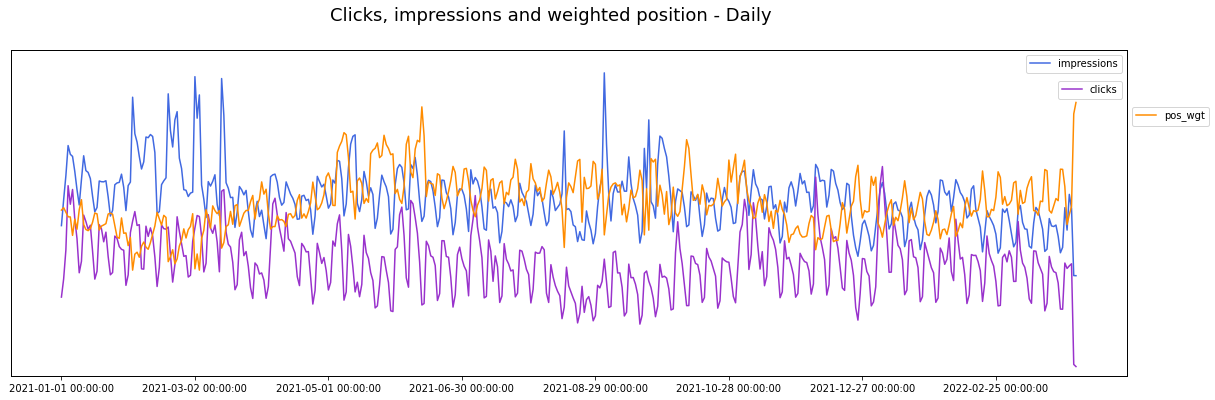

In [30]:
plot_gsc_daily(daily_all_queries)

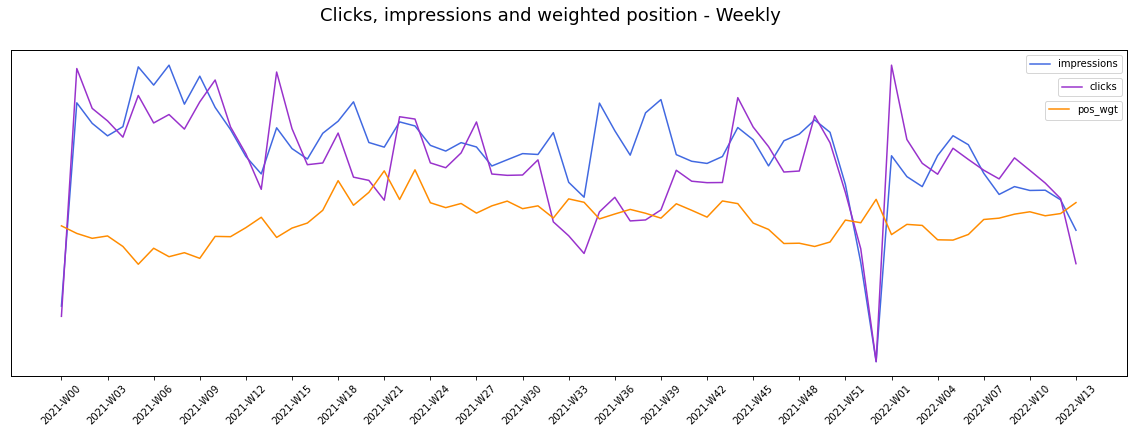

In [31]:
plot_gsc_weekly(weekly_all_queries)

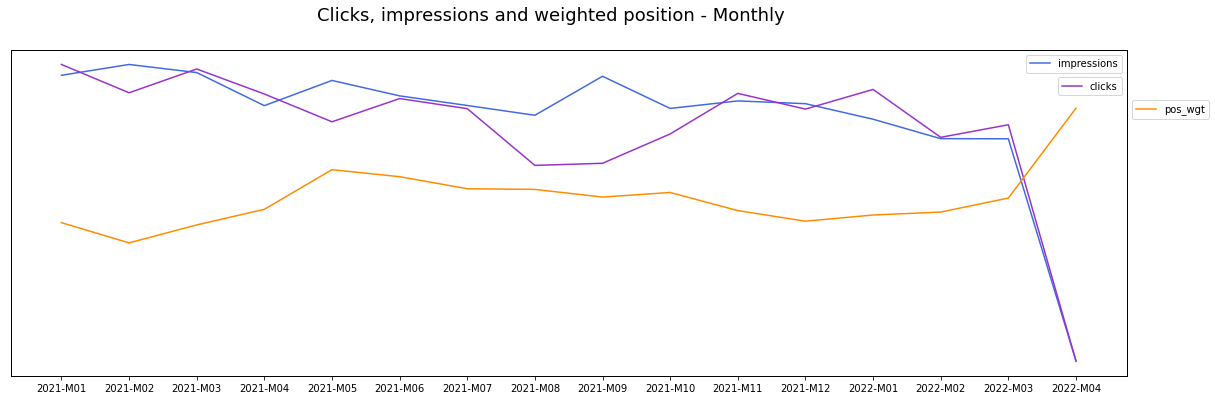

In [32]:
plot_gsc_monthly(monthly_all_queries)

## KPIs variation ToT

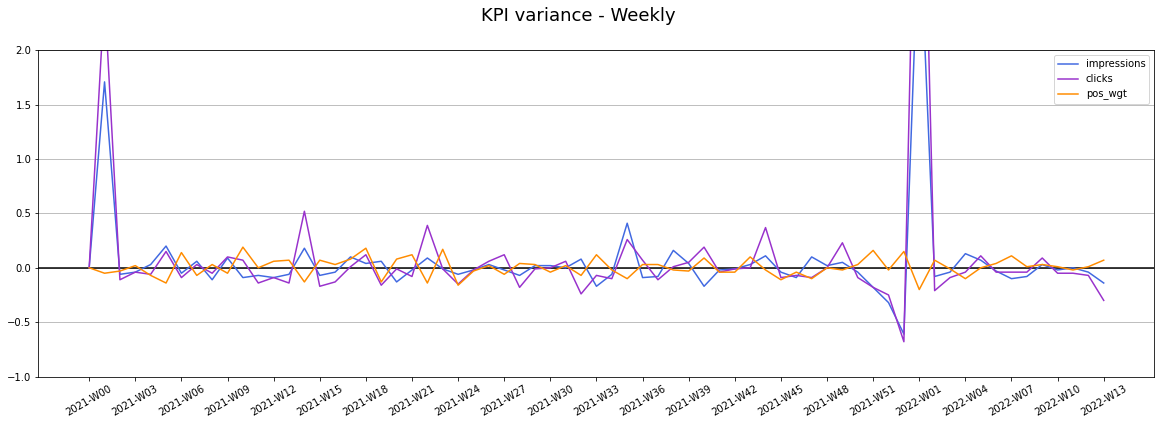

In [33]:
plot_gsc_weeklyVar(weekly_all_queries)

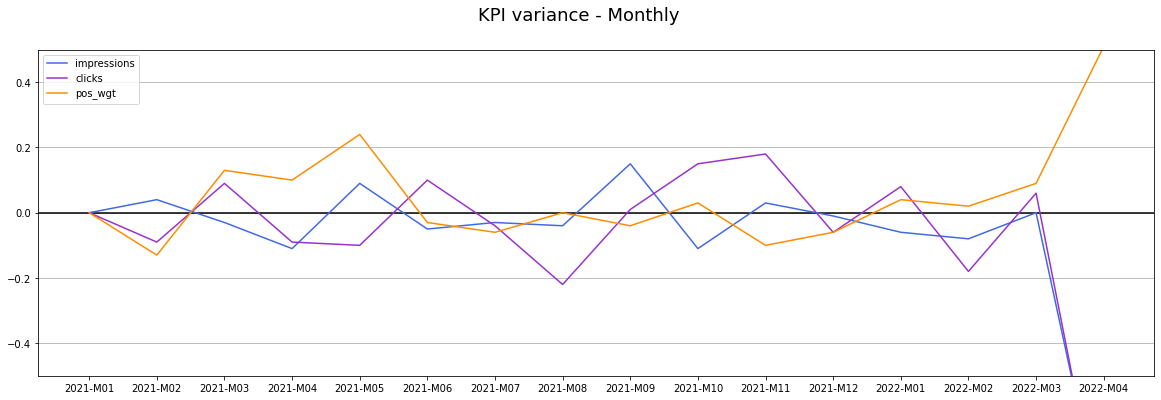

In [34]:
plot_gsc_monthlyVar(monthly_all_queries)

## KPIs accumulated evolution

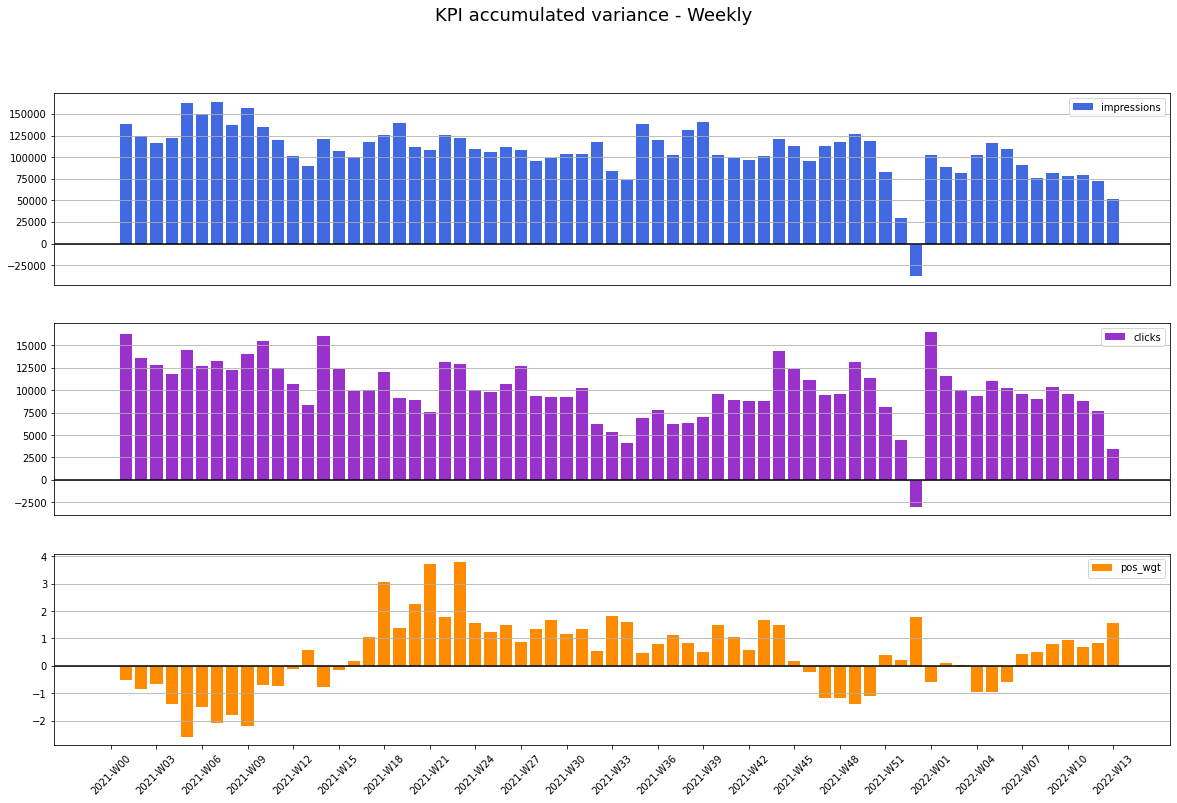

In [35]:
plot_gsc_weeklyVar_acc(weekly_all_queries)

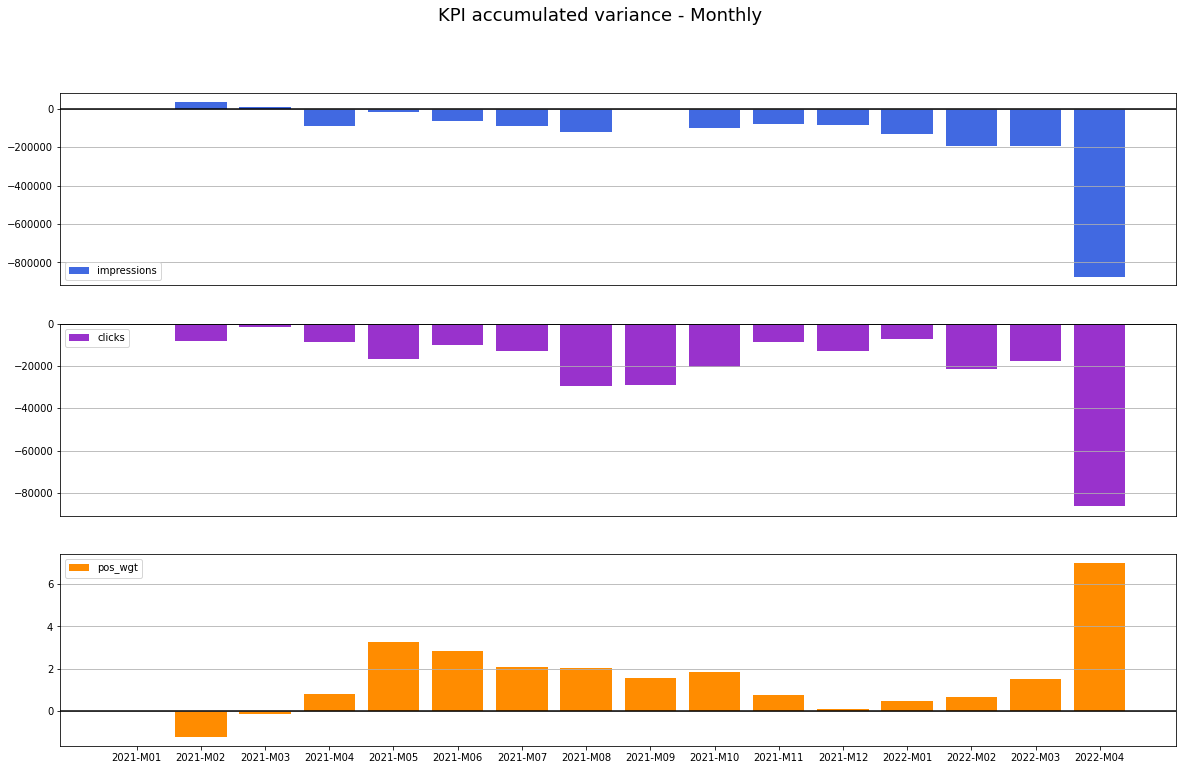

In [36]:
plot_gsc_monthlyVar_acc(monthly_all_queries)

# Is it focused on Branded queries, Generic, or both?

## Branded queries

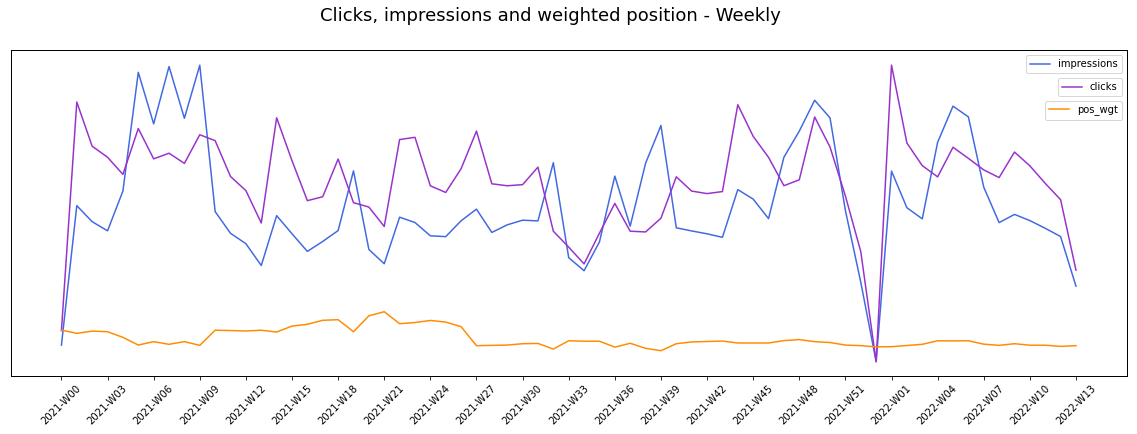

In [37]:
plot_gsc_weekly(weekly_branded_queries)

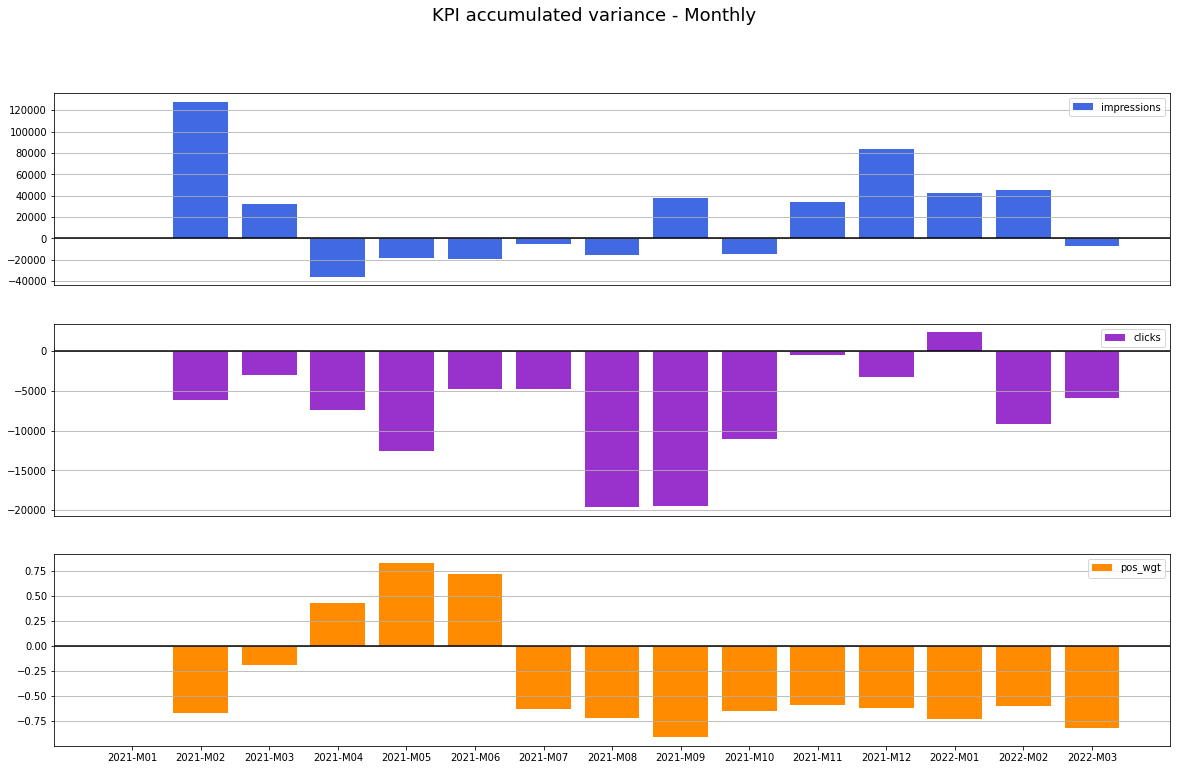

In [38]:
plot_gsc_monthlyVar_acc(monthly_branded_queries)

## Generic queries

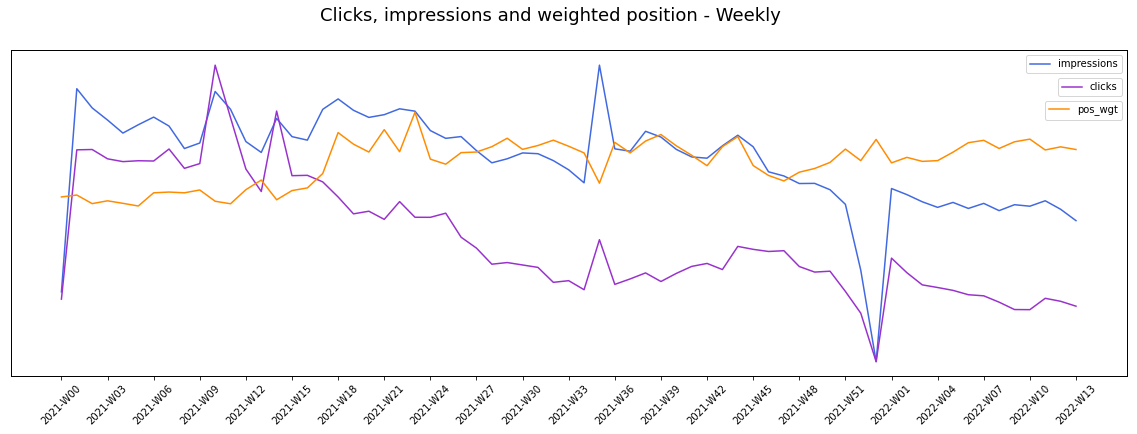

In [39]:
plot_gsc_weekly(weekly_generic_queries)

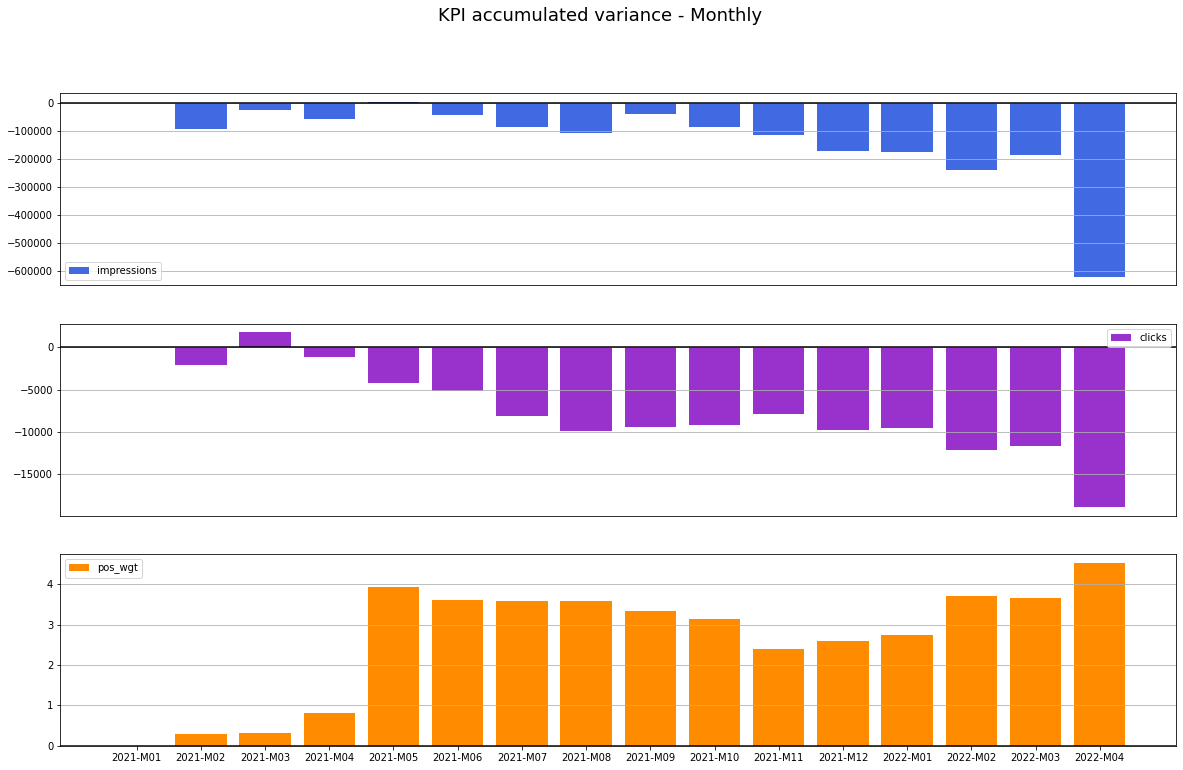

In [40]:
plot_gsc_monthlyVar_acc(monthly_generic_queries)

# Which specific queries concentrate the loss?

In [41]:
# ensure proper order
df_all_queries = df_all_queries.sort_values(
    by=['date', 'impressions'], ascending=[True, False])

# create diffs for each query
df_all_queries['imp_diff'] = df_all_queries.groupby(['query'])['impressions'].diff().fillna(0)
df_all_queries['clicks_diff'] = df_all_queries.groupby(['query'])['clicks'].diff().fillna(0)    
df_all_queries['pos_diff'] = df_all_queries.groupby(['query'])['position'].diff().fillna(0)


## Branded queries

In [42]:
# show top queries losing

branded_queries = df_all_queries.loc[df_all_queries['query'].str.contains(r'.*v(e|é)r(i|y)sur.*|.*ver(.*)su.*')]

top_loss_branded = branded_queries.groupby('query').agg(clicks_diff=('clicks_diff', 'mean'),
                                                        imp_diff=('imp_diff', 'mean'),
                                                        pos_diff=('pos_diff', 'mean')).round(2).reset_index()

top_loss_branded.sort_values(by='clicks_diff', ascending=True).head(15)

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,query,clicks_diff,imp_diff,pos_diff
357,bac de fumée verisure,-1.67,-5.42,0.00
2958,verisure norme nfa2p,-1.26,-1.70,-0.00
2019,verisure a2p,-1.05,-9.48,-0.09
2386,verisure chatenay,-1.00,-0.50,0.00
356,bac de fumee verisure,-1.00,-4.00,0.00
822,détecteur extérieur avec images verisure,-0.77,-1.38,0.00
1691,service client my verisure,-0.75,-0.25,0.00
3245,verisure satisfait ou remboursé,-0.67,-0.33,0.00
1443,prix alarme.verisure,-0.67,-1.33,0.00
529,changer mot de passe verisure,-0.67,-0.33,0.00


## Generic queries

In [43]:
# show top queries losing

generic_queries = df_all_queries.loc[~df_all_queries['query'].str.contains(r'.*v(e|é)r(i|y)sur.*|.*ver(.*)su.*')]

top_loss_generic = generic_queries.groupby('query').agg(clicks_diff=('clicks_diff', 'mean'),
                                                        imp_diff=('imp_diff', 'mean'),
                                                        pos_diff=('pos_diff', 'mean')).round(2).reset_index()

top_loss_generic.sort_values(by='clicks_diff', ascending=True).head(15)

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,query,clicks_diff,imp_diff,pos_diff
38635,signes voleurs portes,-2.25,-71.50,0.50
5340,apsad+pn,-1.50,-11.75,0.75
11203,camera surveillance entreprise legislation,-1.00,0.00,0.00
43380,un homme jacking,-1.00,-5.17,0.00
43379,un home jacking,-0.71,-2.52,0.01
26163,installer camera de surveillance maison,-0.67,0.00,0.17
15925,comment protéger sa résidence secondaire des squats ?,-0.67,-5.67,-0.03
8556,cambriolage croix,-0.67,-0.33,0.00
31765,nombre de home jacking en france,-0.62,-3.43,0.47
15921,comment protéger sa maison des squatteurs,-0.60,-1.00,0.17


# Behavior by device

In [44]:
# ensure proper order

df_branded_device = df_branded_device.sort_values(by=['date', 'device'], ascending=True)
df_generic_device = df_generic_device.sort_values(by=['date', 'device'], ascending=True)

## Branded queries

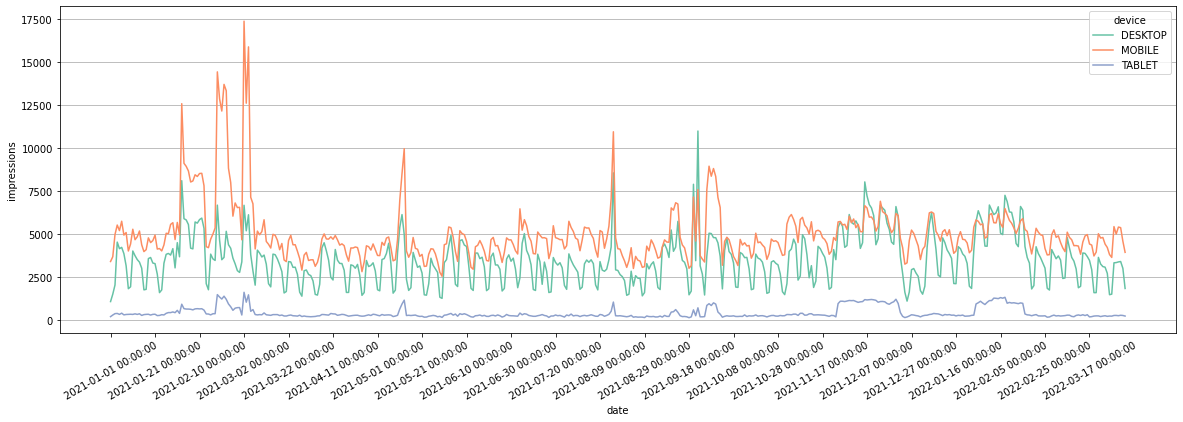

In [45]:
# impressions behavior

plot_device(df_branded_device, 'impressions')

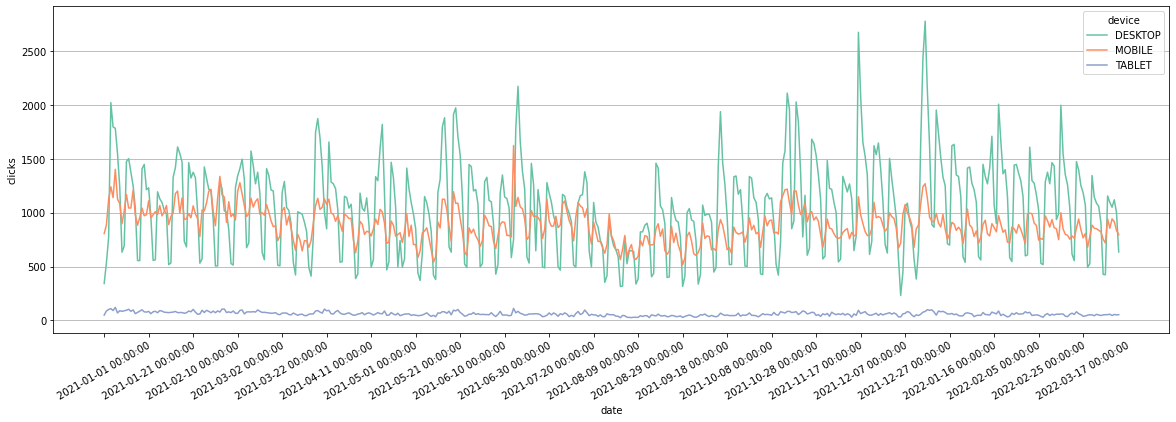

In [46]:
# clicks behavior

plot_device(df_branded_device, 'clicks')

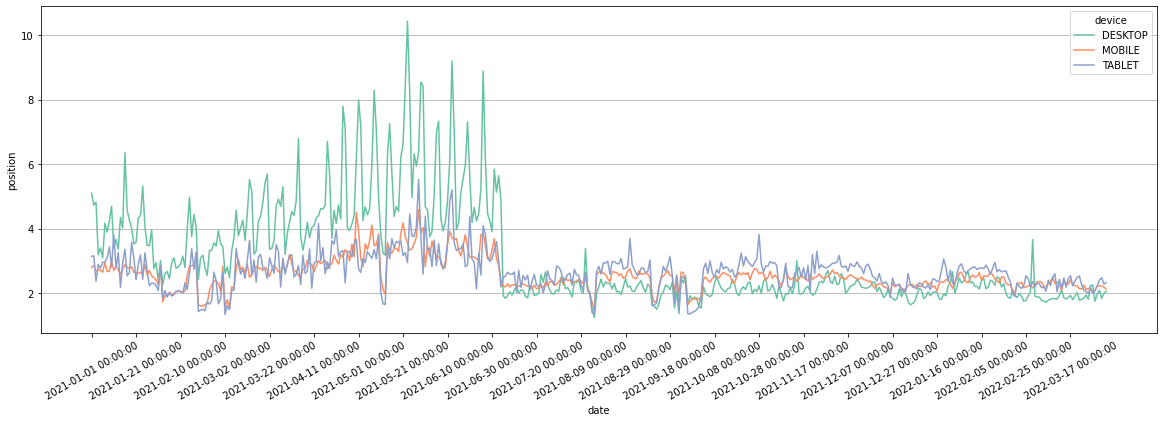

In [47]:
# position behavior

plot_device(df_branded_device, 'position')

## Generic queries

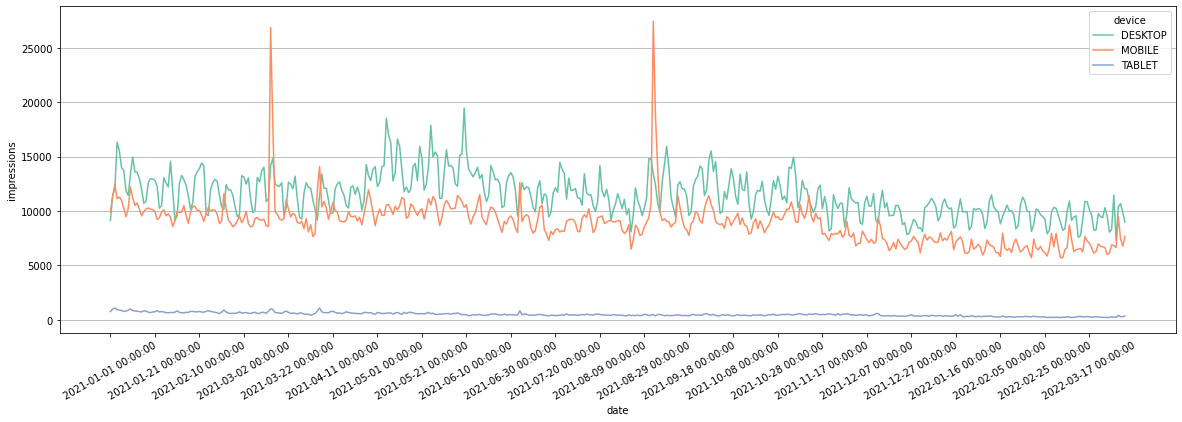

In [48]:
# impressions behavior

plot_device(df_generic_device, 'impressions')

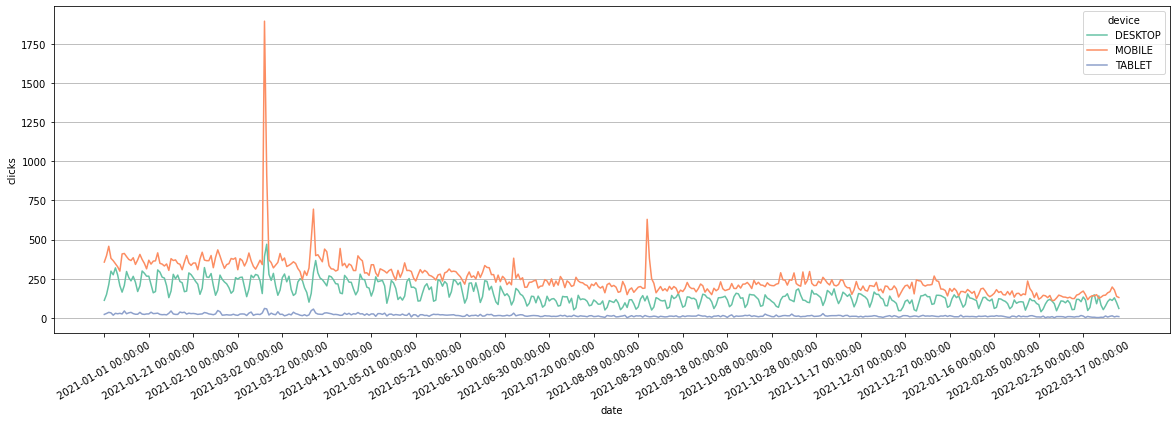

In [49]:
# clicks behavior

plot_device(df_generic_device, 'clicks')

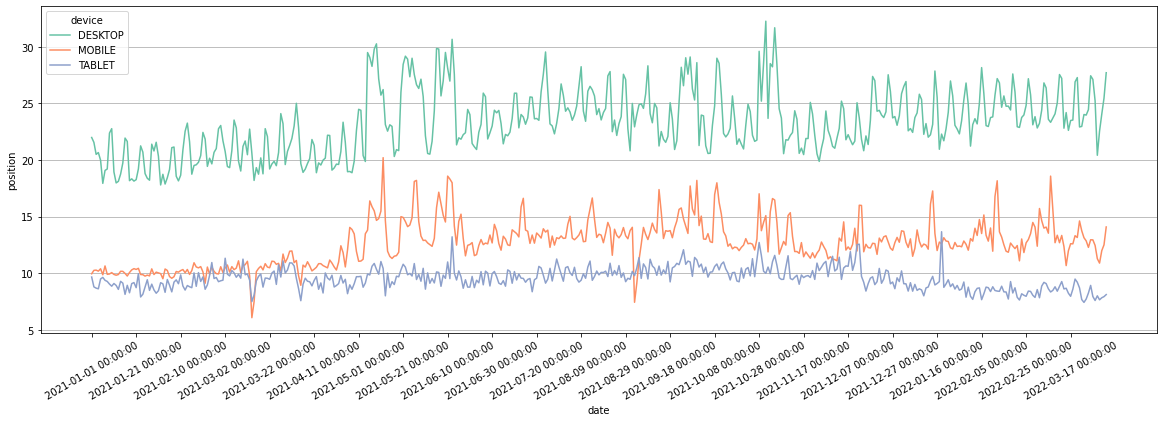

In [50]:
# positions behavior

plot_device(df_generic_device, 'position')